# Лабороторная работа №2

Кодуков А.В. 9382

Цель работы – практическое применение дискретного преобразования Фурье c
использованием библиотек Python для анализа речевых сигналов.

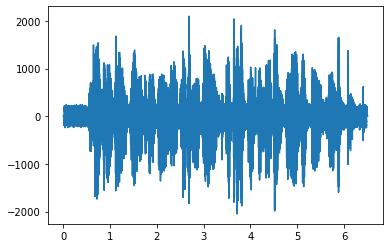

In [59]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np

rate, data = read("./voice.wav")
data = data[:, 0]
time = np.linspace(0, len(data) / rate, num = len(data))
plt.plot(time, data)
plt.show()

## 1. Построение траектории основного тона (F0) на записи своего голоса.

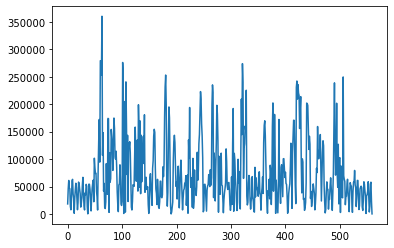

In [102]:
import more_itertools as mit

def DFT(interval):
    interval = np.asarray(interval, dtype=float)
    N = interval.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, interval)

N = 1024
spec_res = round(rate / N)
overlap = 0.5

intervals = list(mit.windowed(data, n=N, step=int(overlap*N)))
intervals[-1] = [i for i in intervals[-1] if i != None]
intervals = [i * np.hamming(len(i)) for i in intervals]

intervals = [DFT(i) for i in intervals]
amplitude_spec = [sum([j**2 for j in i[:int(len(i)/2)]])**0.5 for i in intervals]
amplitude_spec = np.array([i.real for i in amplitude_spec])
plt.plot(amplitude_spec)
plt.show()

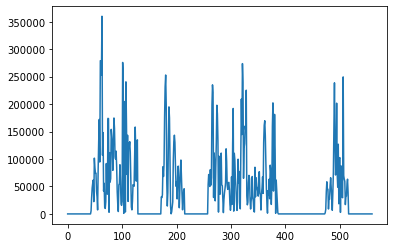

In [103]:
F0 = []
ch = list(mit.windowed(amplitude_spec, n=round(rate/N), step=round(rate/N)))
ch[-1] = [i for i in ch[-1] if i]
for i in range(len(ch)):
    ch[i] = list(ch[i])
for i in ch:
    seg = np.array(i)
    if seg.max() > 3*seg.mean():            
        F0 += seg.tolist()
    else:
        F0 += [0 for i in range(len(seg))]

plt.plot(F0)
plt.show()

## 2. Построение траектории второй, третьей и четвертой формантных частот на записи своего голоса.

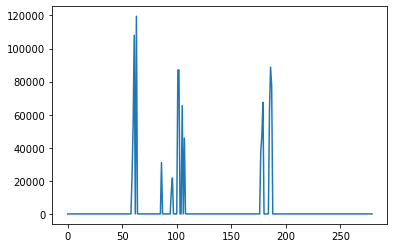

In [104]:
F1 = []
for i in range(len(F0) // 2):
    maximal = max([F0[2*i], F0[2*i-1], F0[2*i+1]])
    if F0[i] > maximal * 2:
        F1 += [maximal]
    else:
        F1 += [0]
plt.plot(F1)
plt.show()

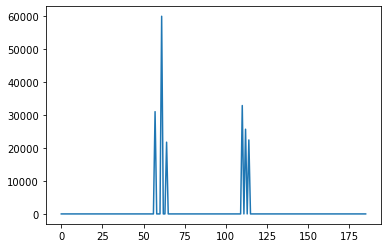

In [105]:
F2 = []
i = 0
for i in range(len(F0) // 3):
    maximal = max([F0[3 * i], F0[3 * i - 1], F0[3 * i + 1]])
    if F0[i] > maximal * 4:
        F2 += [maximal]
    else:
        F2 += [0]
plt.plot(F2)
plt.show()

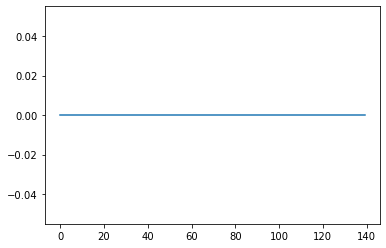

In [109]:
F3 = []

for i in range(len(F0) // 4):
        maximal = max([F0[4 * i], F0[4 * i - 1], F0[4 * i + 1]])
        if F0[i] > maximal * 8:
            F3 += [maximal]
        else:
            F3 += [0]
plt.plot(F3)
plt.show()

## 3. Построение сонограммы по записи своего голоса

In [114]:
import plotly.express as px
amplitude_img=np.array(ch[:-1], dtype=float)
fig = px.imshow(amplitude_img)
fig.show()

Вывод: были изучены основные совйства ДПФ, проанализирован речевой сигнал с помощью Python